In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ham-spam.csv')
df.head(1)

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...


In [3]:
df.shape

(1000, 2)

In [4]:
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        500    499   paso firm capacity award memorandumlouise del...    2
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [5]:
df = df.drop_duplicates()
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
x = vectorizer.fit_transform(df['Text'])
y = df['IsSpam']

In [8]:
text = vectorizer.transform(['Why pay MORE for * expensive meds when you can ...123... order them online and save $$$?'])
text = vectorizer.inverse_transform(text)
print(text)

[array(['expensive', 'meds', 'online', 'order', 'order online', 'pay',
       'save'], dtype='<U401')]


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

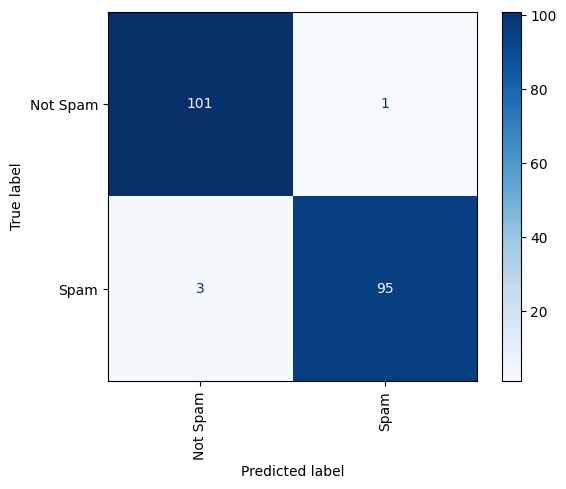

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate and plot confusion matrix
ConfusionMatrixDisplay.from_estimator(
    model,  # your trained model
    x_test,  # test features
    y_test,  # true labels
    display_labels=['Not Spam', 'Spam'],
    cmap='Blues',
    xticks_rotation='vertical'
)
plt.show()

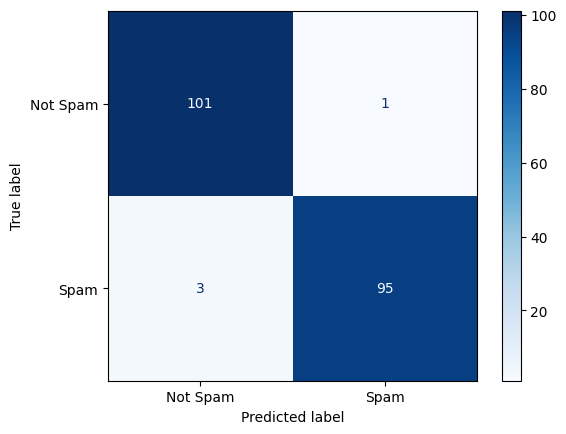

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate and plot confusion matrix
ConfusionMatrixDisplay.from_estimator(
    model,  # your trained model
    x_test,  # test features
    y_test,  # true labels
    display_labels=['Not Spam', 'Spam'],
    cmap='Blues',
    xticks_rotation='horizontal'
)
plt.show()

In [21]:
model.score(x_test, y_test)

0.98

In [22]:
 from sklearn.metrics import roc_auc_score
 probabilities = model.predict_proba(x_test)
 roc_auc_score(y_test, probabilities[:, 1])

0.9992997198879552

In [24]:
message = vectorizer.transform(['Can you attend a code review on Tuesday? Need to make sure the logic is rock solid.'])
model.predict(message)[0]

0